## KMeans Clustering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Reading the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['CustomerID','Gender','Age','Income','Spending']

In [4]:
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Classify Similar Customers together based on Income and Spending

In [5]:
import seaborn as sns
import matplotlib.pylab as plt

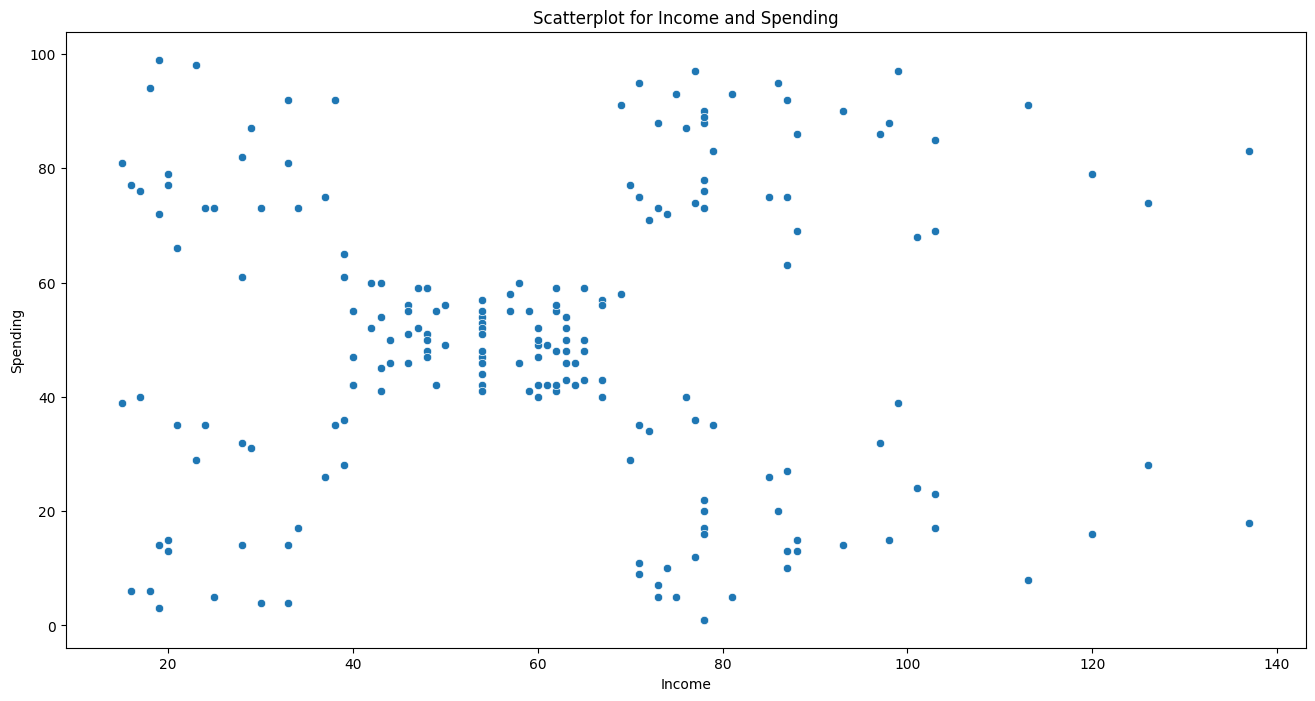

In [6]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df,x='Income',y='Spending')
plt.title('Scatterplot for Income and Spending')
plt.show()

#### Get the required data in X

In [7]:
X = df[['Income','Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Create a Sklearn pipeline for X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('Scaler',StandardScaler())])

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [11]:
cols = num_pipe.get_feature_names_out()
cols

array(['Income', 'Spending'], dtype=object)

In [12]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#### Get the yellowbricks package for elbow Visualization

In [16]:
%pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
     -------------- --------------------- 112.6/282.6 kB 504.4 kB/s eta 0:00:01
     -------------- --------------------- 112.6/282.6 kB 504.4 kB/s eta 0:00:01
     -------------- --------------------- 112.6/282.6 kB 504.4 kB/s eta 0:00:01
     -------------- --------------------- 112.6/282.6 kB 504.4 kB/s eta 0:00:01
     ------------------------------- ---- 245.8/282.6 kB 580.1 kB/s eta 0:00:01
     ------------------------------- ---- 245.8/282.6 kB 580.1 kB/s eta 0:00:01
     ------------------------------- ---- 245.8/282.6 kB 580.1 kB/s eta 0:00:01
     ------------------------------- ---- 245.8/282.6 kB 580.1 kB/s eta


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Restart and run all cells

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

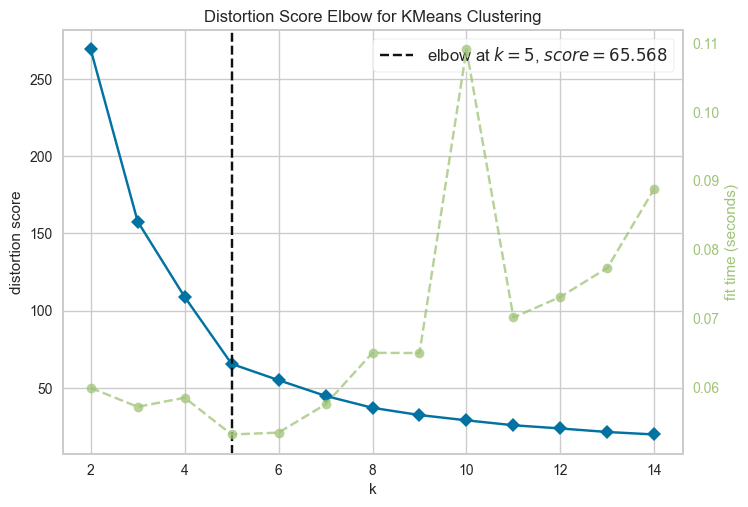

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15))

In [19]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=True)

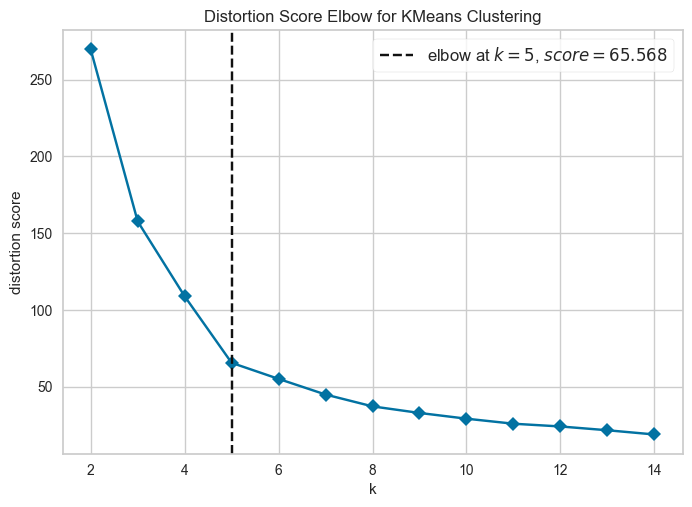

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [20]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

#### KMeans final model

In [21]:
model1 = KMeans(n_clusters=5)
model1.fit(X_pre)

KMeans(n_clusters=5)

In [22]:
lb = model1.labels_
lb

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [23]:
X['Label'] = lb

In [24]:
X

,Income,Spending,Label
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


In [25]:
X[X['Label']==0]

,Income,Spending,Label
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [26]:
X[X['Label']==1]

,Income,Spending,Label
124,70,29,1
128,71,11,1
130,71,9,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
144,77,12,1
146,77,36,1
148,78,22,1


In [27]:
X[X['Label']==2]

,Income,Spending,Label
0,15,39,2
2,16,6,2
4,17,40,2
6,18,6,2
8,19,3,2
10,19,14,2
12,20,15,2
14,20,13,2
16,21,35,2
18,23,29,2


In [28]:
X[X['Label']==3]

,Income,Spending,Label
123,69,91,3
125,70,77,3
127,71,95,3
129,71,75,3
131,71,75,3
133,72,71,3
135,73,88,3
137,73,73,3
139,74,72,3
141,75,93,3


In [29]:
X[X['Label']==4]

,Income,Spending,Label
1,15,81,4
3,16,77,4
5,17,76,4
7,18,94,4
9,19,72,4
11,19,99,4
13,20,77,4
15,20,79,4
17,21,66,4
19,23,98,4


#### Centroids

In [30]:
C = X.groupby(by='Label').mean()
C

,Income,Spending
Label,,
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,86.538462,82.128205
4,25.727273,79.363636


#### Visualize cluster with seaborn

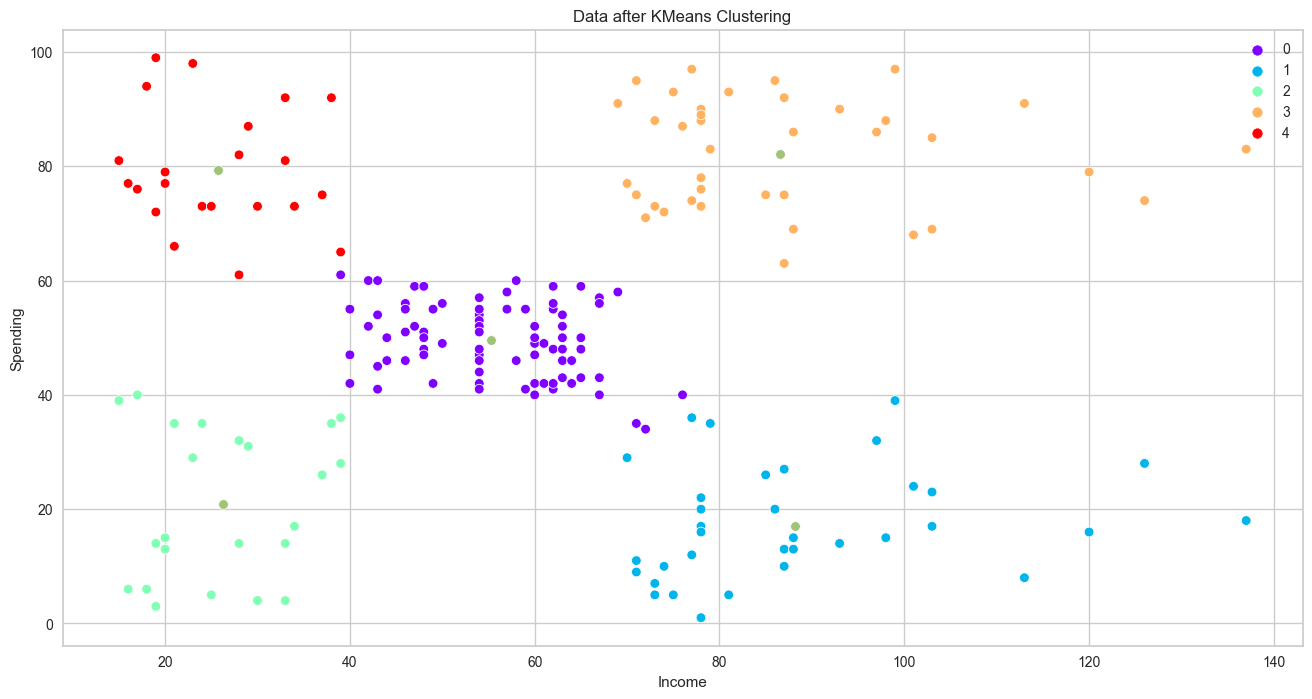

In [31]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=X, x='Income', y='Spending', hue='Label', palette='rainbow')
sns.scatterplot(data=C, x='Income', y='Spending')
plt.title('Data after KMeans Clustering')
plt.show()

#### Classify similar customers on basis of Age, Income, Spending


In [32]:
X2 = df[['Age','Income','Spending']]
X2

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


#### Preprocessing for X2

In [33]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [34]:
X_pre2 = num_pipe2.fit_transform(X2)
X_pre2[0:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [35]:
cols2 = num_pipe2.get_feature_names_out()
cols2

array(['Age', 'Income', 'Spending'], dtype=object)

In [36]:
X_pre2 = pd.DataFrame(X_pre2, columns=cols2)
X_pre2.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [37]:
X_pre2 = pd.DataFrame(X_pre2, columns=cols2)
X_pre2.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


#### Apply K-elbow visualizer

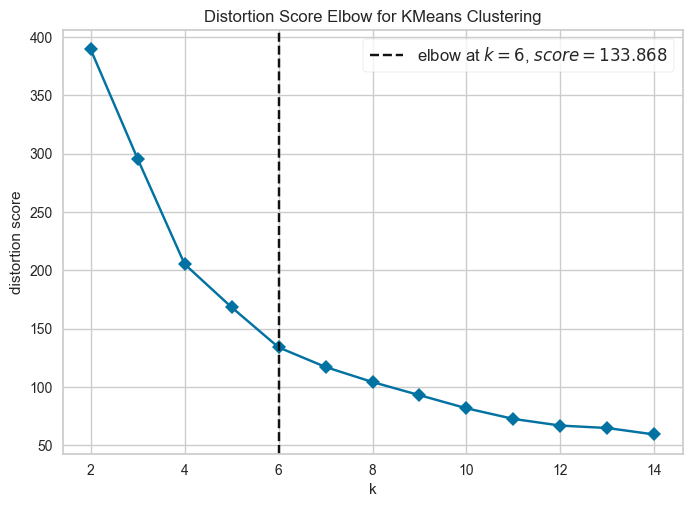

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [38]:
kelbow_visualizer(KMeans(),
                  X_pre2,
                  k=(2,15),
                  timings=False)

#### Create final Model

In [39]:
model2 = KMeans(n_clusters=5)
model2.fit(X_pre2)

KMeans(n_clusters=5)

In [40]:
lb2 = model2.labels_
lb2

array([4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4,
       1, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 3, 4, 4, 4, 2, 2, 2, 2, 4, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [41]:
X2['Label']=lb2

In [42]:
X2

,Age,Income,Spending,Label
0,19,15,39,4
1,21,15,81,4
2,20,16,6,1
3,23,16,77,4
4,31,17,40,4
...,...,...,...,...
195,35,120,79,0
196,45,126,28,3
197,32,126,74,0
198,32,137,18,3


In [43]:

for i in range(6):
    print(f'Cluster number : {i} \n')
    display(X2[X2['Label']==i])
    print('\n=================================================\n')

Cluster number : 0 



,Age,Income,Spending,Label
122,40,69,58,0
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0
133,31,72,71,0
135,29,73,88,0
137,32,73,73,0
139,35,74,72,0




Cluster number : 1 



,Age,Income,Spending,Label
2,20,16,6,1
6,35,18,6,1
8,64,19,3,1
10,67,19,14,1
12,58,20,15,1
14,37,20,13,1
16,35,21,35,1
18,52,23,29,1
20,35,24,35,1
22,46,25,5,1




Cluster number : 2 



,Age,Income,Spending,Label
40,65,38,35,2
46,50,40,55,2
50,49,42,52,2
53,59,43,60,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2
57,69,44,46,2
59,53,46,46,2
60,70,46,56,2




Cluster number : 3 



,Age,Income,Spending,Label
112,38,64,42,3
121,38,67,40,3
124,23,70,29,3
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
132,25,72,34,3
134,20,73,5,3
136,44,73,7,3
138,19,74,10,3




Cluster number : 4 



,Age,Income,Spending,Label
0,19,15,39,4
1,21,15,81,4
3,23,16,77,4
4,31,17,40,4
5,22,17,76,4
7,23,18,94,4
9,30,19,72,4
11,35,19,99,4
13,24,20,77,4
15,22,20,79,4




Cluster number : 5 



,Age,Income,Spending,Label


#### Make use of plotly for 3D Graphs

In [44]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
C2 = X2.groupby(by='Label').mean()
C2

,Age,Income,Spending
Label,,,
0,32.875000,86.100000,81.525000
1,46.250000,26.750000,18.350000
2,55.638298,54.382979,48.851064
3,39.871795,86.102564,19.358974
4,25.185185,41.092593,62.240741


#### Restart and run all cells

In [47]:
import plotly.express as px
px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spending', color='Label')